# Previsão de Preços de Casas 🏠💰

In [ ]:
from sklearn.datasets import fetch_openml
from ydata_profiling import ProfileReport


# Baixando o dataset de preços de casas do OpenML
housing = fetch_openml(name="house_prices", as_frame=True)

# Extraindo o DataFrame dos dados
df = housing.frame

# # Gerando o relatório de perfilamento
# profile = ProfileReport(df, title="Pandas Profiling Report")

# # Ou você pode salvar em um arquivo HTML
# profile.to_file("housing_profile_report.html")

## REGRESSÃO LINEAR

In [55]:
# imports
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [56]:
# Baixando o dataset de preços de casas do OpenML
housing = fetch_openml(name="house_prices", as_frame=True)

# Extraindo o DataFrame dos dados
df = housing.frame

# Converter colunas categóricas em variáveis dummy
df_encoded = pd.get_dummies(df, drop_first=True)

In [57]:
# Calculando a correlação com a variável alvo (SalePrice)
correlation = df_encoded.corr()['SalePrice'].sort_values(ascending=False)
top_10_features = correlation.drop('SalePrice').head(10)

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(x=top_10_features.values, y=top_10_features.index)
plt.title(' Variáveis mais Correlacionadas com SalePrice')
plt.xlabel('Correlação')
plt.ylabel('Variáveis')
plt.show()

print(housing.DESCR)




- **OverallQual**: Avalia o material e o acabamento geral da casa  
  - 10: Muito Excelente  
  - 9: Excelente  
  - 8: Muito Bom  
  - 7: Bom  
  - 6: Acima da Média  
  - 5: Média  
  - 4: Abaixo da Média  
  - 3: Regular  
  - 2: Ruim  
  - 1: Muito Ruim  

- **GrLivArea**: Área de estar acima do solo (em pés quadrados)  

- **GarageCars**: Tamanho da garagem em capacidade de carros  

- **GarageArea**: Tamanho da garagem em pés quadrados  

- **TotalBsmtSF**: Área total do porão em pés quadrados  

- **1stFlrSF**: Área do primeiro andar em pés quadrados  

- **FullBath**: Banheiros completos acima do solo  

- **TotRmsAbvGrd**: Total de quartos acima do solo (não inclui banheiros)  

- **YearBuilt**: Data original de construção  

- **YearRemodAdd**: Data de remodelação (igual à data de construção se não houve remodelação ou adições)


In [ ]:
# Extraindo os dados e o alvo
data = housing.data
target = housing.target

# Combinando os dados e o alvo em um único DataFrame
df = pd.concat([data, target], axis=1)

# Atualizando o DataFrame X com as variáveis selecionadas
X = df_encoded[top_10_features]
y = df_encoded['SalePrice']


In [ ]:
# Dividindo os dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Instanciando o modelo
modelo = LinearRegression()

# Treinando o modelo
modelo.fit(X_train, y_train)

In [59]:
# Fazendo previsões no conjunto de teste
y_pred = modelo.predict(X_test)

# Avaliando o modelo
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)

print(f"Erro Quadrático Médio: {mse:.2f}")
print(f"R²: {r2:.2f}")
print(f"Raiz do Erro Quadrático Médio (RMSE): {rmse:.2f}")

# Criando um DataFrame para comparar valores reais e previstos
resultado = pd.DataFrame({'Valor Real': y_test, 'Previsão': y_pred})

# Exibindo as 10 primeiras comparações
print(resultado.head(10))

Erro Quadrático Médio: 1440923076.81
R²: 0.81
Raiz do Erro Quadrático Médio (RMSE): 37959.49
      Valor Real   Previsão
892       154500 154,000.00
1105      325000 340,000.00
413       115000 128,000.00
522       159000 172,500.00
1036      315500 377,500.00
614        75500  81,000.00
218       311500 205,000.00
1160      146000 148,500.00
649        84500  81,000.00
887       135500 152,000.00


c:\Users\Rafael S Moura\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


#### Coeficiente de Determinação (R²)

- **Valor:** 0,80

Um R² de 0,80 significa que 80% da variabilidade nos dados de `SalePrice` é explicada pelo modelo. Isso é considerado um bom ajuste, pois o modelo consegue capturar a maior parte da variabilidade nos dados. 

  - **Próximo de 1:** Indica um ajuste muito bom.
  - **Próximo de 0:** Indica que o modelo não está explicando bem os dados.

#### Erro Quadrático Médio (MSE)

- **Valor:** 1.558.239.575,15

Um MSE de 1.558.239.575,15 é um valor absoluto grande, indicando que, em média, há uma grande diferença entre as previsões e os valores reais. Esse valor é útil para:


## ÁRVORE DE DECISÃO

In [ ]:
# Imports 
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
# Baixando o dataset de preços de casas do OpenML
housing = fetch_openml(name="house_prices", as_frame=True)

# Extraindo os dados e o alvo
data = housing.data
target = housing.target

# Combinando os dados e o alvo em um único DataFrame
df = pd.concat([data, target], axis=1)

# Convertendo colunas categóricas em variáveis dummy
df_encoded = pd.get_dummies(df, drop_first=True)

# Calculando a correlação com a variável alvo (SalePrice)
correlation = df_encoded.corr()['SalePrice'].sort_values(ascending=False)

# Selecionando as principais features com base na correlação
top_10_features = correlation.drop('SalePrice').head(10).index
X = df_encoded[top_10_features]
y = df_encoded['SalePrice']

In [61]:
# Dividindo os dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Instanciando e treinando o modelo de árvore de decisão
modelo = DecisionTreeRegressor(random_state=42)
modelo.fit(X_train, y_train)

# Fazendo previsões no conjunto de teste
y_pred = modelo.predict(X_test)

# Avaliando o modelo
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Erro Quadrático Médio (MSE): {mse:.2f}")
print(f"Coeficiente de Determinação (R²): {r2:.2f}")

Erro Quadrático Médio (MSE): 1440923076.81
Coeficiente de Determinação (R²): 0.81


      Valor Real   Previsão
892       154500 154,000.00
1105      325000 340,000.00
413       115000 128,000.00
522       159000 172,500.00
1036      315500 377,500.00
614        75500  81,000.00
218       311500 205,000.00
1160      146000 148,500.00
649        84500  81,000.00
887       135500 152,000.00


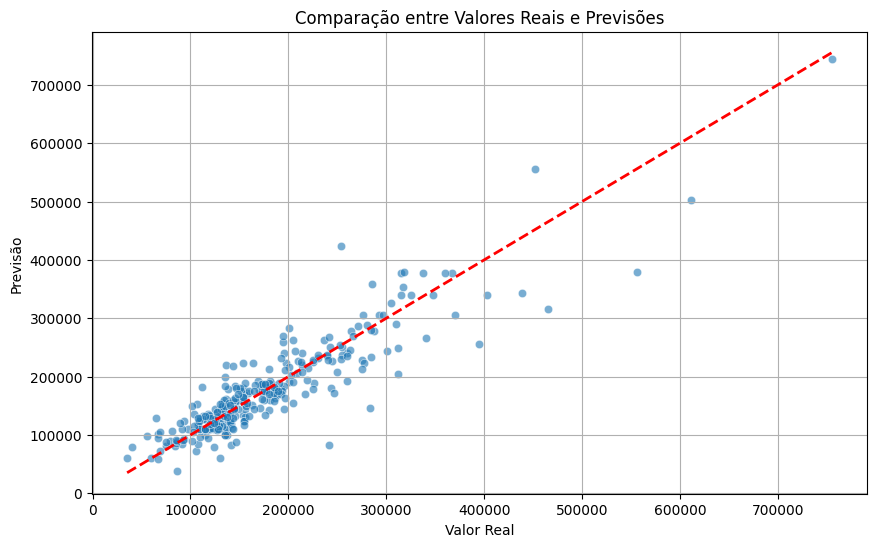

In [62]:
# Criando um DataFrame para comparar valores reais e previstos
resultado = pd.DataFrame({'Valor Real': y_test, 'Previsão': y_pred})

# Exibindo as 10 primeiras comparações
print(resultado.head(10))

# Criando um DataFrame para comparar valores reais e previstos
resultado = pd.DataFrame({'Valor Real': y_test, 'Previsão': y_pred})

# Criando o gráfico de dispersão
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Valor Real', y='Previsão', data=resultado, alpha=0.6)
plt.plot([resultado['Valor Real'].min(), resultado['Valor Real'].max()],
         [resultado['Valor Real'].min(), resultado['Valor Real'].max()],
         color='red', linestyle='--', linewidth=2)
plt.xlabel('Valor Real')
plt.ylabel('Previsão')
plt.title('Comparação entre Valores Reais e Previsões')
plt.grid(True)
plt.show()

In [63]:
linha_tal = df.loc[218]
print(linha_tal)


Id                  219
MSSubClass           50
MSZoning             RL
LotFrontage         NaN
LotArea           15660
                  ...  
MoSold                5
YrSold             2008
SaleType             WD
SaleCondition    Normal
SalePrice        311500
Name: 218, Length: 81, dtype: object
